# A Framework for Leveraging LLMs for Scene Analysis and Cognitive Processing

## Setup

In [1]:
import os
HOME = os.getcwd()

os.chdir(HOME)
print(HOME)

/home/catarina/Documents/GitHub/human_exploration_cleaned


In [2]:
import os
HOME = os.getcwd()


import torch

import numpy as np

from classes.ImageData import ImageData
from classes.LLM import LLM
from classes.SAM_Segmentation import SAM_Segmentation

import pandas as pd

from IPython.display import display, HTML

from utils.llm_utils import *
from utils.experiment_data import *

import utils.style as stl
from utils.experiment_utils import *

import matplotlib.pyplot as plt

from utils.prompts import *

import pickle

In [3]:

DATA_DIR = os.path.join(HOME, "data", "experiments")
IMAGE_DIR = os.path.join(HOME, "data", "images")
RESULTS_DIR = os.path.join(HOME, "outputs")

SAM_CONFIG = os.path.join("configs", "sam2.1", "sam2.1_hiera_l.yaml")
SAM_MODEL =  os.path.join(HOME, "checkpoints", "sam2.1_hiera_large.pt")

print("HOME:", HOME)
print("DATA_DIR:", DATA_DIR)
print("IMAGE_DIR:", IMAGE_DIR)
print("SAM_CONFIG:", SAM_CONFIG)
print("SAM_MODEL:", SAM_MODEL)

HOME: /home/catarina/Documents/GitHub/human_exploration_cleaned
DATA_DIR: /home/catarina/Documents/GitHub/human_exploration_cleaned/data/experiments
IMAGE_DIR: /home/catarina/Documents/GitHub/human_exploration_cleaned/data/images
SAM_CONFIG: configs/sam2.1/sam2.1_hiera_l.yaml
SAM_MODEL: /home/catarina/Documents/GitHub/human_exploration_cleaned/checkpoints/sam2.1_hiera_large.pt


## Participant Gaze

In [4]:
prompt_diameter = 10
prompt_n_points = 5

# colors for eye gaze plots
font_color =  "yellow"          
COLOR_CODE_1 = "fixation_scarletred_meddark"
COLOR_CODE_2 = "aluminium"
COLOR_CODE_3 = "yellow"

In [5]:
# load experiment data
data_path = os.path.join(DATA_DIR , "XSQ_Expt1_Data_2.csv")
data = pd.read_csv( data_path )
data.head()


,ParticipantID,Group,Condition,ItemNum,X,Y,FixationDuration,Rel_Scene_Region_Rel_X1,Rel_Scene_Region_Rel_Y1,Rel_Scene_Region_Rel_X2,...,Irrev_Scene_Region_X1,Irrev_Scene_Region_Y1,Irrev_Scene_Region_X2,Irrev_Scene_Region_Y2,Irrev_Scene_Region_IrrelSceneFix,Cntl_Scene_Region_X1,Cntl_Scene_Region_Y1,Cntl_Scene_Region_X2,Cntl_Scene_Region_Y2,Cntl_Scene_Region_CntlSceneFix
0,2,1,1,1,398.0,314.2,291,0.0,464.0,800.0,...,0.0,0.0,800.0,247.0,0.0,0.0,380.0,800.0,680.0,0.0
1,2,1,1,1,323.4,398.2,421,0.0,464.0,800.0,...,0.0,0.0,800.0,247.0,0.0,0.0,380.0,800.0,680.0,1.0
2,2,1,1,1,23.6,492.2,268,0.0,464.0,800.0,...,0.0,0.0,800.0,247.0,0.0,0.0,380.0,800.0,680.0,1.0
3,2,1,1,1,483.6,565.0,162,0.0,464.0,800.0,...,0.0,0.0,800.0,247.0,0.0,0.0,380.0,800.0,680.0,1.0
4,2,1,1,2,379.6,305.1,206,0.0,435.0,800.0,...,0.0,0.0,800.0,247.0,0.0,0.0,380.0,800.0,680.0,0.0


## Image Segmentation and Mask Generation

In [6]:
CENTER_BIAS_SECONDS = 1    # remove first 1 second of data to remove center bias

prompt_types = ["point", "circle", "triangle", "cross"]


GENERATE_MASKS = False

if GENERATE_MASKS:      
    for img_id in range(1, 2):
        for prompt_type in prompt_types:
            image_data = segment_image(img_id, data, condition_id=1, center_bias_seconds=CENTER_BIAS_SECONDS, prompt_type=prompt_type,  img_type="exp")
            image_data = segment_image(img_id, data, condition_id=3, center_bias_seconds=CENTER_BIAS_SECONDS, prompt_type=prompt_type,  img_type="unexp")


### Find the best mask for each participant

In [7]:
IMG_ID = 1
IMG_TYPE = "exp"
PROMPT_TYPE = "point"

participant_ids = get_participant_ids( os.path.join(RESULTS_DIR, "masks_gaze_driven", PROMPT_TYPE) , IMG_TYPE) 
print("Total participants: ", len(participant_ids))


Total participants:  17


20


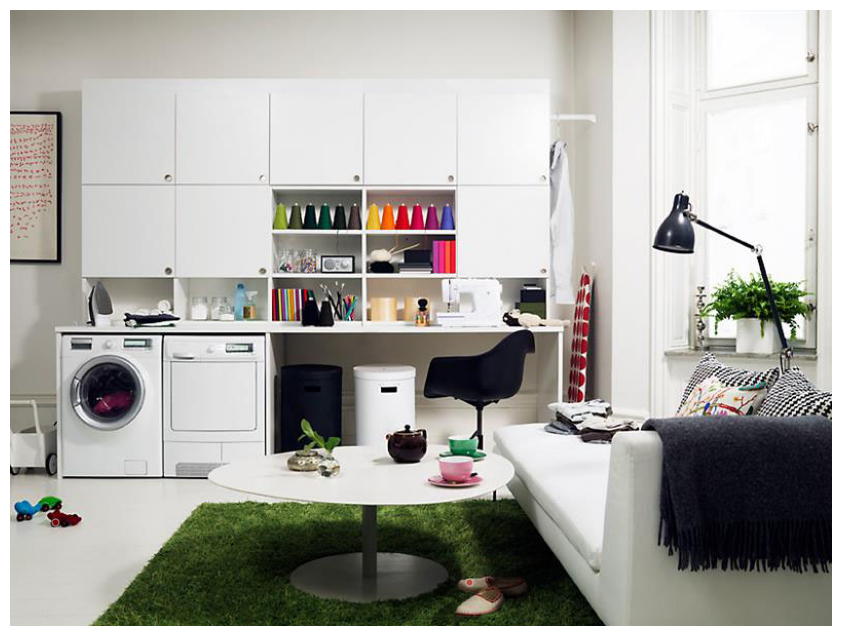

In [27]:
P_INDX = 3
print(participant_ids[P_INDX])
img_data, participant_data = load_image_data(IMG_ID, IMG_TYPE, participant_id=participant_ids[P_INDX], prompt_type=PROMPT_TYPE)

img_data.draw_fixations( participant_data, fix_color=stl.COLORS[COLOR_CODE_1][0], fix_edge_color=stl.COLORS[COLOR_CODE_2][1], size = 25 )


Processing mask 0 for participant 20


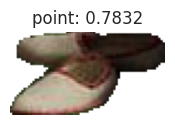

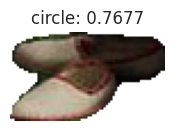

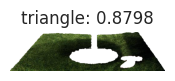

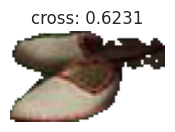

Processing mask 1 for participant 20


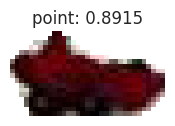

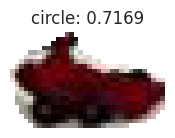

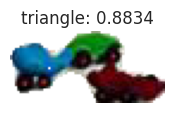

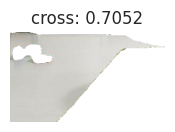

In [28]:
get_mask_candidates(1, 20, prompt_types, "exp")


2


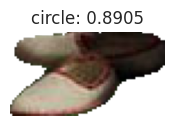

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_2_MASK_0_circle.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_2_MASK_0_circle_0.8905.pkl
3


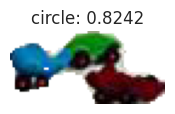

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_3_MASK_0_circle.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_3_MASK_0_circle_0.8242.pkl
15


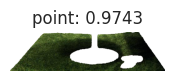

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_15_MASK_0_point.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_15_MASK_0_point_0.9743.pkl


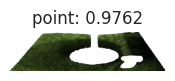

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_15_MASK_1_point.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_15_MASK_1_point_0.9762.pkl


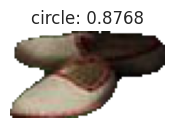

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_15_MASK_2_circle.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_15_MASK_2_circle_0.8768.pkl
20


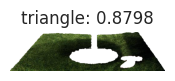

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_20_MASK_0_triangle.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_20_MASK_0_triangle_0.8798.pkl


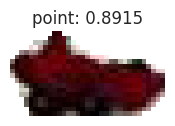

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_20_MASK_1_point.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_20_MASK_1_point_0.8915.pkl
21


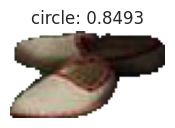

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_21_MASK_0_circle.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_21_MASK_0_circle_0.8493.pkl


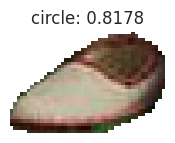

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_21_MASK_1_circle.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_21_MASK_1_circle_0.8178.pkl


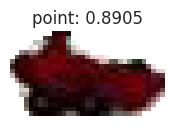

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_21_MASK_2_point.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_21_MASK_2_point_0.8905.pkl


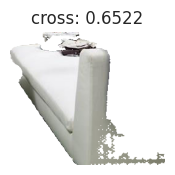

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_21_MASK_3_cross.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_21_MASK_3_cross_0.6522.pkl


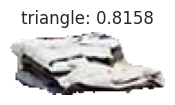

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_21_MASK_4_triangle.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_21_MASK_4_triangle_0.8158.pkl
27


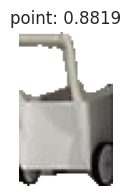

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_27_MASK_0_point.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_27_MASK_0_point_0.8819.pkl
32


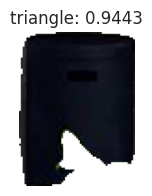

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_32_MASK_0_triangle.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_32_MASK_0_triangle_0.9443.pkl


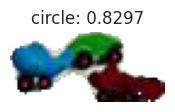

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_32_MASK_1_circle.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_32_MASK_1_circle_0.8297.pkl


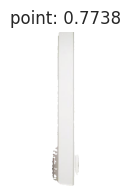

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_32_MASK_2_point.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_32_MASK_2_point_0.7738.pkl


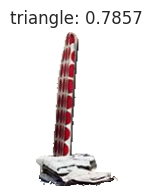

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_32_MASK_3_triangle.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_32_MASK_3_triangle_0.7857.pkl


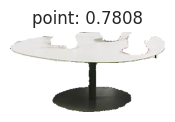

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_32_MASK_4_point.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_32_MASK_4_point_0.7808.pkl


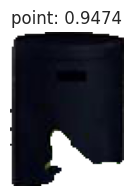

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_32_MASK_5_point.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_32_MASK_5_point_0.9474.pkl


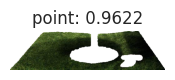

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_32_MASK_6_point.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_32_MASK_6_point_0.9622.pkl
38


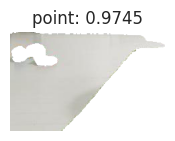

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_38_MASK_0_point.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_38_MASK_0_point_0.9745.pkl


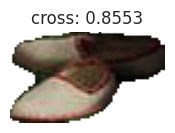

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_38_MASK_1_cross.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_38_MASK_1_cross_0.8553.pkl
43


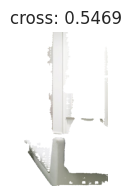

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_43_MASK_0_cross.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_43_MASK_0_cross_0.5469.pkl


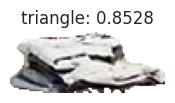

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_43_MASK_1_triangle.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_43_MASK_1_triangle_0.8528.pkl


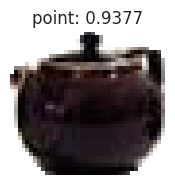

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_43_MASK_2_point.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_43_MASK_2_point_0.9377.pkl


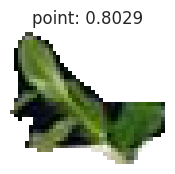

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_43_MASK_3_point.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_43_MASK_3_point_0.8029.pkl
45


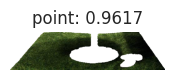

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_45_MASK_0_point.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_45_MASK_0_point_0.9617.pkl


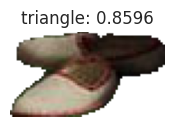

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_45_MASK_1_triangle.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_45_MASK_1_triangle_0.8596.pkl


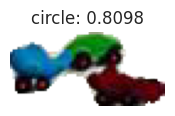

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_45_MASK_2_circle.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_45_MASK_2_circle_0.8098.pkl


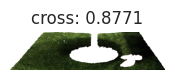

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_45_MASK_3_cross.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_45_MASK_3_cross_0.8771.pkl
63


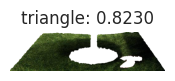

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_63_MASK_0_triangle.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_63_MASK_0_triangle_0.8230.pkl
66


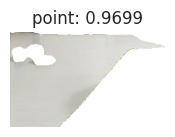

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_66_MASK_0_point.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_66_MASK_0_point_0.9699.pkl


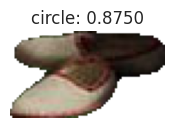

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_66_MASK_1_circle.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_66_MASK_1_circle_0.8750.pkl
76


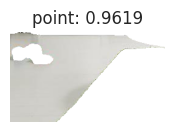

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_76_MASK_0_point.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_76_MASK_0_point_0.9619.pkl
78


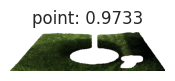

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_78_MASK_0_point.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_78_MASK_0_point_0.9733.pkl


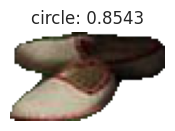

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_78_MASK_1_circle.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_78_MASK_1_circle_0.8543.pkl


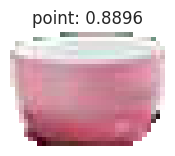

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_78_MASK_2_point.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_78_MASK_2_point_0.8896.pkl


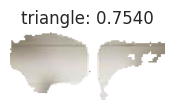

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_78_MASK_3_triangle.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_78_MASK_3_triangle_0.7540.pkl


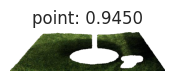

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_78_MASK_4_point.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_78_MASK_4_point_0.9450.pkl


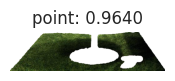

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_78_MASK_5_point.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_78_MASK_5_point_0.9640.pkl


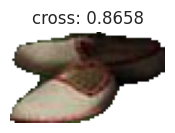

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_78_MASK_6_cross.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_78_MASK_6_cross_0.8658.pkl


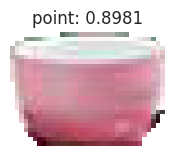

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_78_MASK_7_point.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_78_MASK_7_point_0.8981.pkl


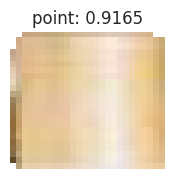

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_78_MASK_8_point.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_78_MASK_8_point_0.9165.pkl


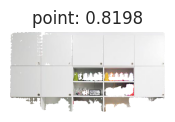

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_78_MASK_9_point.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_78_MASK_9_point_0.8198.pkl


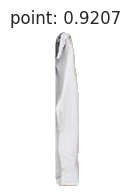

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_78_MASK_10_point.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_78_MASK_10_point_0.9207.pkl
82


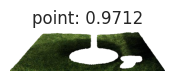

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_82_MASK_0_point.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_82_MASK_0_point_0.9712.pkl
88


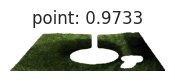

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_88_MASK_0_point.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_88_MASK_0_point_0.9733.pkl


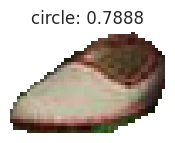

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_88_MASK_1_circle.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_88_MASK_1_circle_0.7888.pkl


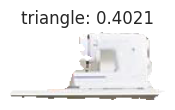

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_88_MASK_2_triangle.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_88_MASK_2_triangle_0.4021.pkl


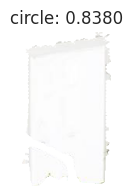

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_88_MASK_3_circle.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_88_MASK_3_circle_0.8380.pkl


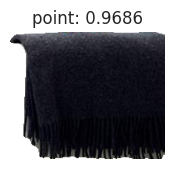

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_88_MASK_4_point.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_88_MASK_4_point_0.9686.pkl


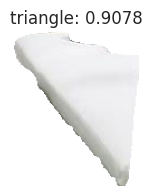

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_88_MASK_5_triangle.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_88_MASK_5_triangle_0.9078.pkl


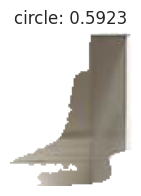

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_88_MASK_6_circle.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_88_MASK_6_circle_0.5923.pkl


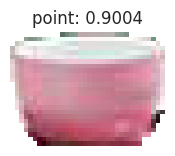

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_88_MASK_7_point.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_88_MASK_7_point_0.9004.pkl
100


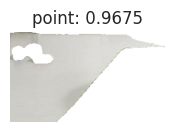

Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_100_MASK_0_point.png
Mask saved as /home/catarina/Documents/GitHub/human_exploration_cleaned/outputs/masks_gaze_driven/best/IMG_1_exp_Part_100_MASK_0_point_0.9675.pkl


In [10]:
find_best_mask(IMG_ID, participant_ids, prompt_types, IMG_TYPE)


15


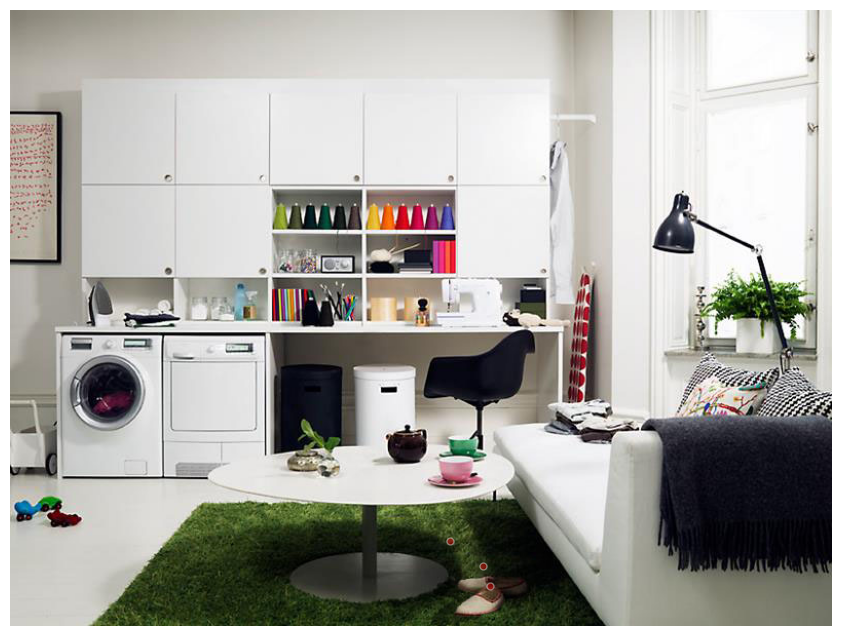

In [57]:
llava = LLM("ollama", "llama3.2-vision:90b")
user_prompt="Analyze the following image and describe its content in detail. You must identify all objects. Add any relevant insights."

resp, answer, duration = llava.analyse_image(img_data, user_prompt, temperature=0.1)
print("Total_time: ", duration, "sec")
format_llm_answer(answer)

In [46]:


#img_data.draw_fixations( participant_data, fix_color=stl.COLORS[COLOR_CODE_1][0], fix_edge_color=stl.COLORS[COLOR_CODE_2][1], size = None )
#img_data.draw_scanpath( participant_data, fix_color=stl.COLORS[COLOR_CODE_1][0], fix_edge_color=stl.COLORS[COLOR_CODE_2][1], 
#                       font_color=stl.COLORS[COLOR_CODE_3][1], size = 30, fontsize=14, width=3)
